In [64]:
COALITIONS = {
    'SLD': ['PSL', 'PO', 'Kukiz15', 'Razem', 'Nowoczesna'],
    'PiS': ['Konfederacja', 'Kukiz15'],
    'PO': ['PSL', 'SLD', 'Razem', 'Nowoczesna'],
    'PSL': ['PO', 'Kukiz15', 'LEWICA'],
    'KORWiN': ['Konfederacja'],
    'Razem': ['SLD', 'PO', 'Nowoczesna'],
    'Nowoczesna': ['SLD', 'PO', 'Razem'],
    'Konfederacja': ['PiS', 'KORWiN'],
    'Kukiz15': ['PiS', 'SLD', 'PSL'],
    'LEWICA': ['PSL', 'Razem', 'Nowoczesna']   
}

# niewielka siec powiazan 


In [65]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

## 1. przedstaw swój świat

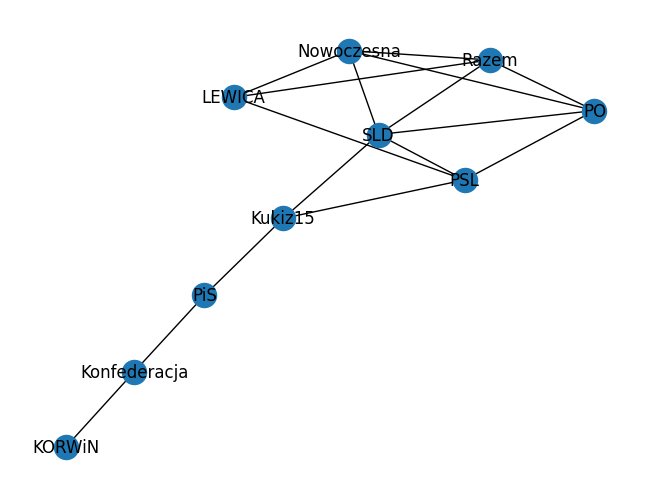

In [73]:
G = nx.Graph()
G.add_nodes_from(COALITIONS.keys())
for coalition, parties in COALITIONS.items():
    for party in parties:
        G.add_edge(coalition, party)
nx.draw_kamada_kawai(G, with_labels=True)

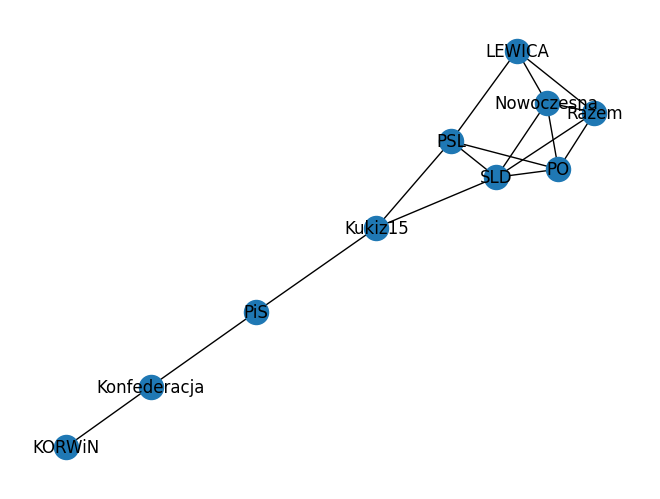

In [67]:
G.nodes()
#G.remove_node('Kukiz15')
nx.draw_spring(G, with_labels=True)


## Jak mały jest twój świat?


In [128]:
try:
    nx.diameter(G)
except nx.NetworkXError:
    print('Graf nie jest spójny')

# jaka partia jest w nim najwazniejsza?

In [69]:
degrees = nx.degree(G)
degrees = dict(degrees)
degrees = sorted(degrees.items(), key=lambda x: x[1], reverse=True)
degrees[0]
print(f'Najwazniejsza partia to {degrees[0][0]} z {degrees[0][1]} wspolpracujacymi partiami')

Najwazniejsza partia to SLD z 5 wspolpracujacymi partiami


## JAKA PARTIA JEST NAJBLIZSZA WSZYSTKIM PARTIOM?

In [89]:
# close
size= nx.closeness_centrality(G)
size = dict(size)
size = sorted(size.items(), key=lambda x: x[1], reverse=True)
print(f'Partia najblizsza wszystkim partiom to {size[0][0]}')

Partia najblizsza wszystkim partiom to SLD


# jak swiat jest odporny na katastrofy

In [105]:
bridges =[bridge for bridge in  nx.bridges(G)]
unique_nodes = set(node for bridge in bridges for node in bridge)
print(f'Jeśli usuniemy jedna z tych {len(unique_nodes)} partii to graf stanie się niespójny: {unique_nodes}')
print(f'jest to {len(unique_nodes)/len(G.nodes())*100:.0f} % ze wszystkich partii')

Jeśli usuniemy jedna z tych 4 partii to graf stanie się niespójny: {'Kukiz15', 'PiS', 'Konfederacja', 'KORWiN'}
jest to 40 % ze wszystkich partii


In [110]:
integrity = nx.k_components(G)
integrity = min(map(int,dict(integrity).keys()))
print(f'aby rozspojnic graf potrzebujemy usunac {integrity} partii/e')

aby rozspojnic graf potrzebujemy usunac 1 partii/e


## kolorowanie grafu

In [132]:
color_dict = nx.coloring.strategy_smallest_last(G, colors=range())
nx.draw_kamada_kawai(G, with_labels=True, node_color=list(color_dict.values()))


AttributeError: 'collections.deque' object has no attribute 'values'

In [123]:
dict(zip(G.nodes(),list(color_dict.values())))

{'SLD': 0,
 'PiS': 1,
 'PO': 2,
 'PSL': 2,
 'KORWiN': 3,
 'Razem': 1,
 'Nowoczesna': 0,
 'Konfederacja': 0,
 'Kukiz15': 1,
 'LEWICA': 0}